In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from tqdm import tqdm
import random
import seaborn as sns
import math
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# DATA_PATH = Path('../input/ump-train-picklefile')
# SAMPLE_TEST_PATH = Path('../input/ubiquant-market-prediction')
# !ls $SAMPLE_TEST_PATH

In [3]:
# train = pd.read_pickle(DATA_PATH/'train.pkl')

In [2]:
train = pd.read_csv('reduced_df.csv', header=0, index_col=0)

In [3]:
# train = pd.read_pickle(DATA_PATH/'train.pkl')
# train.drop(['row_id', 'time_id'], axis=1, inplace=True)
X = train.drop(['target'], axis=1)
y = train["target"]
del train
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.01, random_state=42, shuffle=False)
del X
del y

In [4]:
model = LGBMRegressor(
        objective="regression",
        metric="l2",
        boosting_type="gbdt",
        n_estimators=1400,
        num_leaves=100,
        max_depth=10,
        learning_rate=0.05,
        subsample=0.8
)

model.fit(X_train, y_train,
          eval_set=[(X_valid, y_valid)],
          verbose=50,
          eval_metric='rmse',
          early_stopping_rounds=20)

[50]	valid_0's rmse: 0.607452	valid_0's l2: 0.368998


LGBMRegressor(learning_rate=0.05, max_depth=10, metric='l2', n_estimators=1400,
              num_leaves=100, objective='regression', subsample=0.8)

In [5]:
def plotImp(model, X , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()

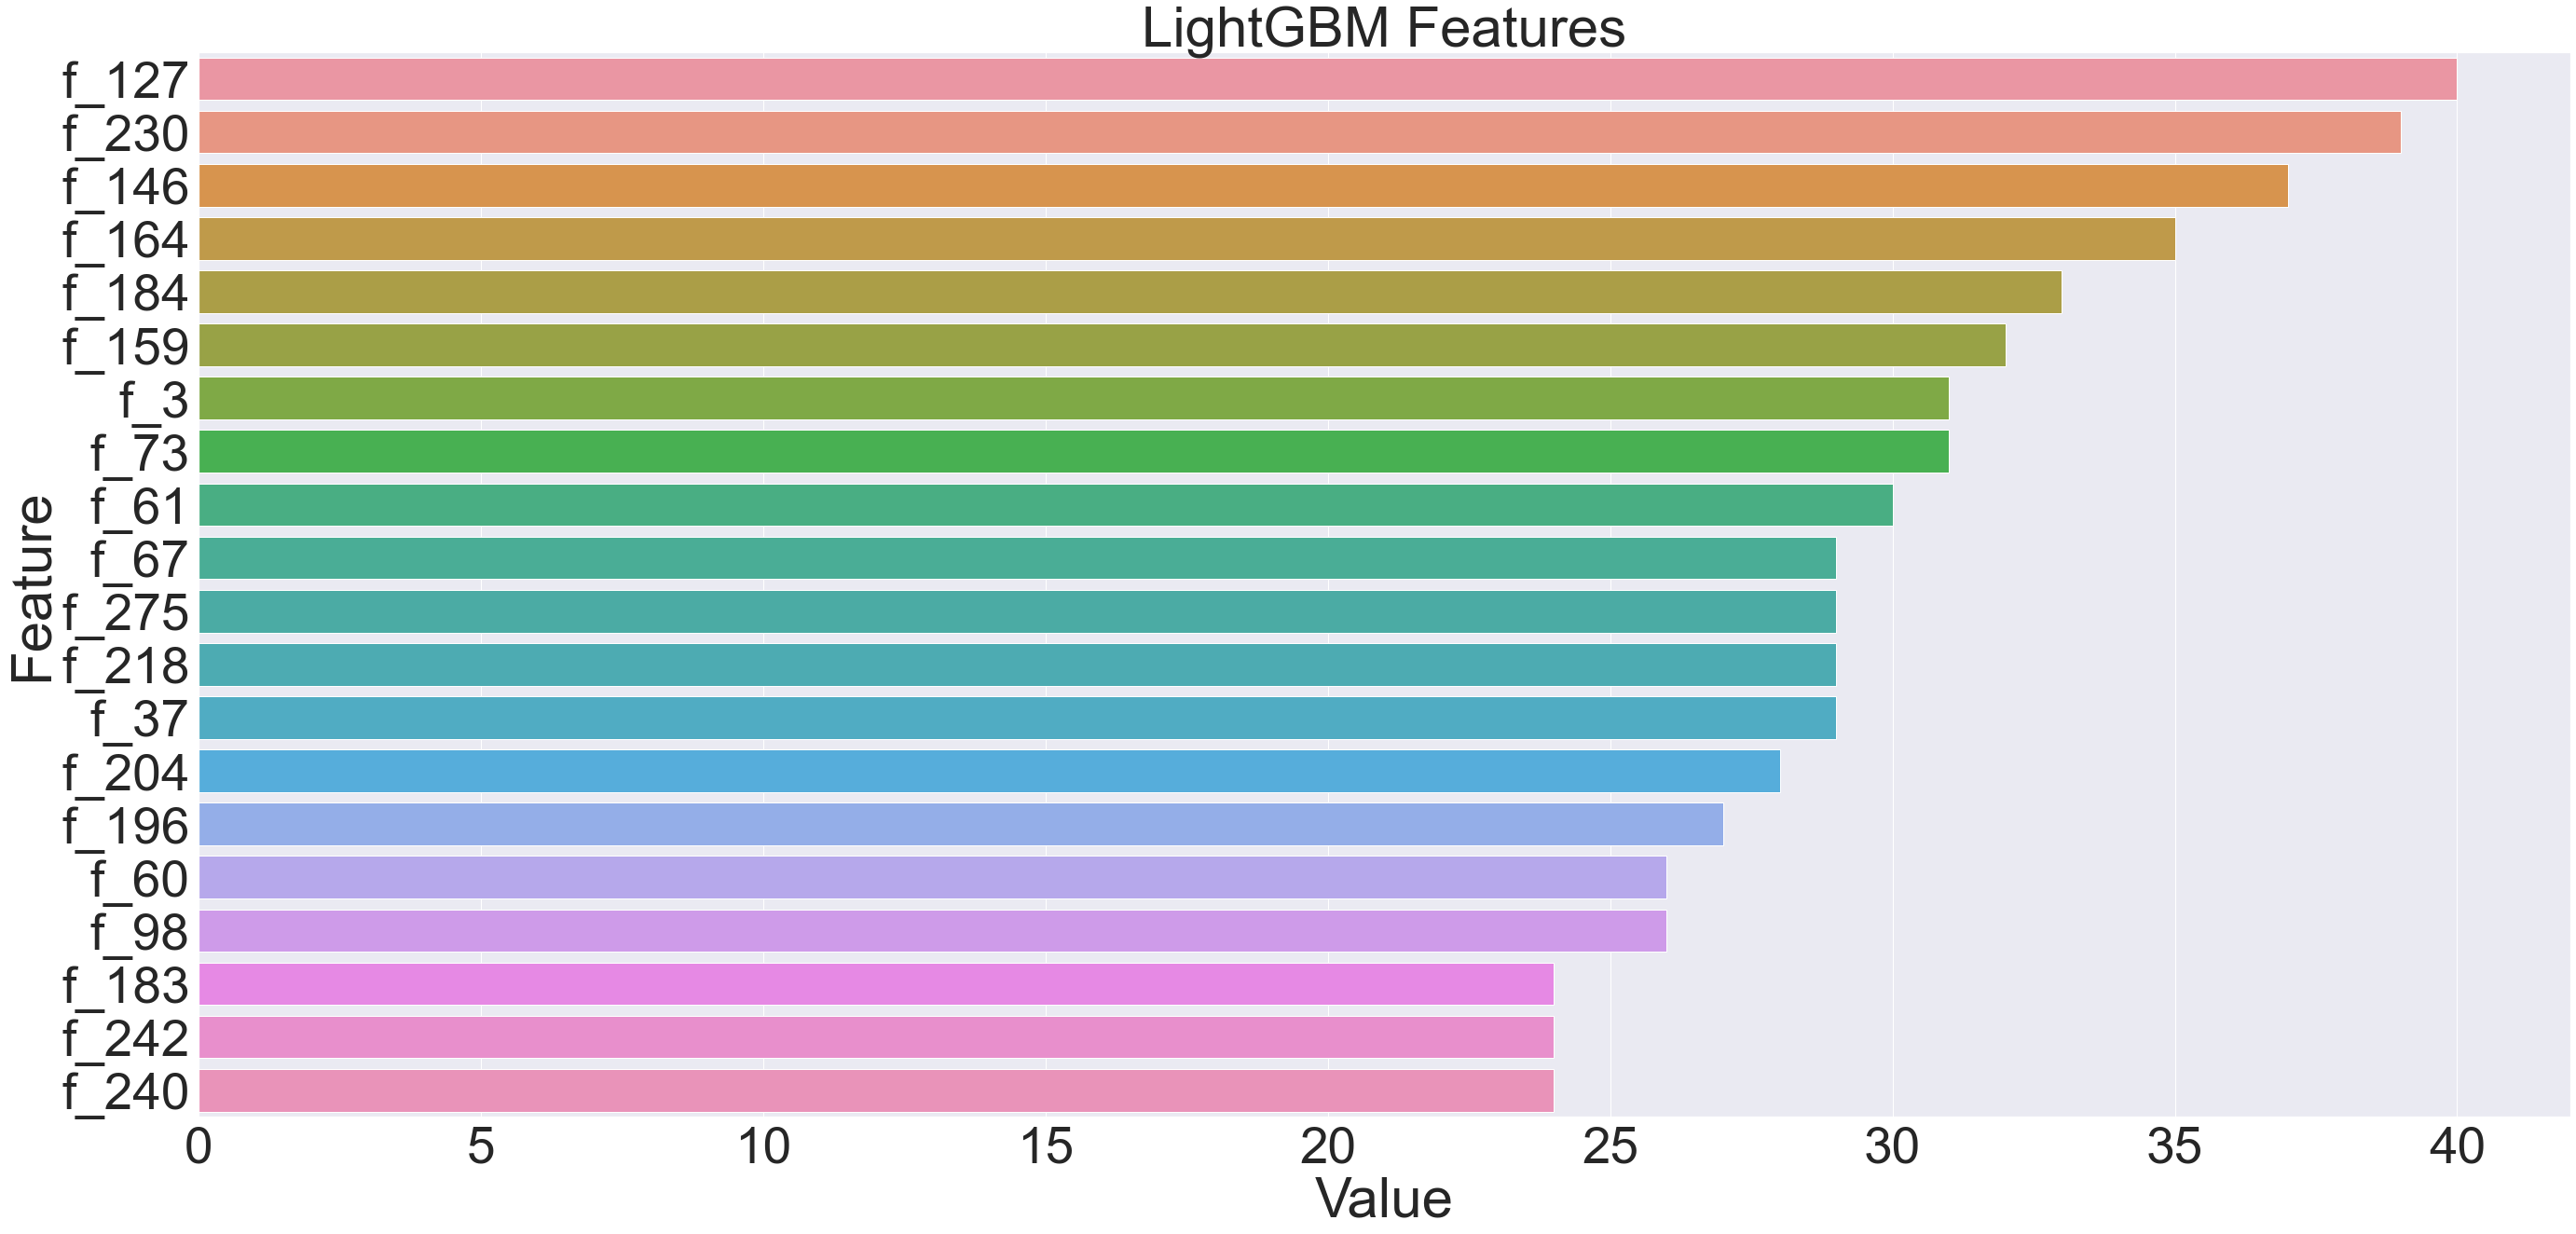

In [6]:
plotImp(model, X_valid)

In [7]:
predictions = model.predict(X_valid)
from sklearn import metrics
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_valid,predictions))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_valid,predictions))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(y_valid,predictions)))

Mean Absolute Error (MAE):  0.4610750506087967
Mean Squared Error (MSE):  0.3486398435261814
Root Mean Squared Error (RMSE):  0.5904573172771944
